In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_parquet('/home/joelva/code/pgt-group-3/data/raw/10_sec_New/HECTORdataAggregated_20240506142622.parquet')

In [3]:
df.shape

(1087947, 61)

In [2]:
#Copy this cell to every new version of Main
#import dataframe
df = pd.read_parquet('/home/joelva/code/pgt-group-3/data/raw/Complete_Set/HECTORdataAggregated_Hourly_20240331152619.parquet')

In [3]:
#Copy this cell to every new version of Main
%run "Utilities.ipynb" 

Exception: File `'Utilities.ipynb'` not found.

In [4]:
from scipy import stats
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

In [5]:
#Copy this cell to every new version of Main
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
#Copy this cell to every new version of Main
df.head()

,Vdatetime,datetime,BatSOC,ThrottlePerc,RearAxle1,H2Weight,MotorRPM,MotorTorque,MotorTemp,BattOutputPower,...,TotalPowerDraw,DayOfWeek,AirTemp,Is_Friday,Is_Monday,Is_Saturday,Is_Sunday,Is_Thursday,Is_Tuesday,Is_Wednesday
0,2022-08-01 04,2022-08-01 04:59:59.880000+00:00,87.733572,94.314217,7108.281063,6241.840427,32.226553,251.142921,40.973181,17290.052132,...,13713.046695,Monday,20.6,0,1,0,0,0,0,0
1,2022-08-01 05,2022-08-01 05:59:59.990000+00:00,81.852431,68.168056,8580.659722,6637.344792,10.728542,119.177014,50.915306,15929.268472,...,9444.155245,Monday,20.6,0,1,0,0,0,0,0
2,2022-08-01 06,2022-08-01 06:59:59.870000+00:00,54.056532,98.022640,7776.109452,5644.733940,37.581013,235.988194,56.864547,16360.531741,...,12075.898738,Monday,20.6,0,1,0,0,0,0,0
3,2022-08-01 07,2022-08-01 07:59:59.820000+00:00,46.348187,213.243523,8328.226385,6329.168194,212.520287,445.930969,72.886717,18460.976244,...,40680.984837,Monday,20.6,0,1,0,0,0,0,0
4,2022-08-01 08,2022-08-01 08:59:59.940000+00:00,24.638125,47.125000,3179.993056,2554.907153,28.368542,71.331042,70.815041,-16121.872074,...,5412.054734,Monday,20.6,0,1,0,0,0,0,0


In [7]:
#Copy this cell to every new version of Main
df.describe

<bound method NDFrame.describe of           Vdatetime                         datetime     BatSOC  ThrottlePerc  \
0     2022-08-01 04 2022-08-01 04:59:59.880000+00:00  87.733572     94.314217   
1     2022-08-01 05 2022-08-01 05:59:59.990000+00:00  81.852431     68.168056   
2     2022-08-01 06 2022-08-01 06:59:59.870000+00:00  54.056532     98.022640   
3     2022-08-01 07 2022-08-01 07:59:59.820000+00:00  46.348187    213.243523   
4     2022-08-01 08 2022-08-01 08:59:59.940000+00:00  24.638125     47.125000   
...             ...                              ...        ...           ...   
2662  2023-04-29 12 2023-04-29 12:59:59.840000+00:00   0.000000      0.000000   
2663  2023-04-29 13 2023-04-29 13:59:59.830000+00:00   0.000000      0.000000   
2664  2023-04-29 14 2023-04-29 14:59:59.840000+00:00   0.000000      0.000000   
2665  2023-04-29 15 2023-04-29 15:59:59.920000+00:00   0.000000      0.000000   
2666  2023-04-29 16 2023-04-29 16:04:35.180000+00:00   0.000000      0.0000

In [8]:
#Copy this cell to every new version of Main 
# List data types of each column
dtypes_result = df.dtypes

# Display descriptive statistics for numerical columns
describe_result = df.describe()

# Combine both results in one code snippet
combined_result = pd.concat([dtypes_result, describe_result], axis=1, keys=['Data Types', 'Statistics'])

# Display the combined result
print(combined_result)


                              Data Types   Statistics               \
                                       0       BatSOC ThrottlePerc   
Vdatetime                         object          NaN          NaN   
datetime         datetime64[us, Etc/UTC]          NaN          NaN   
BatSOC                           float64          NaN          NaN   
ThrottlePerc                     float64          NaN          NaN   
RearAxle1                        float64          NaN          NaN   
H2Weight                         float64          NaN          NaN   
MotorRPM                         float64          NaN          NaN   
MotorTorque                      float64          NaN          NaN   
MotorTemp                        float64          NaN          NaN   
BattOutputPower                  float64          NaN          NaN   
MotorPowerDraw                   float64          NaN          NaN   
TotalFCPower                     float64          NaN          NaN   
ActualSpeed         

In [9]:
# Lijst van geselecteerde variabelen
selected_variables = [
    "BatSOC", "ThrottlePerc", "BrakePerc", "Signal", 
    "TotalDistance", 
    "FC1Volt",  
    "H2Temp", "HVACDraw", "MotorTemp"
]

# Selecteer alleen de numerieke kolommen
df_clean = df.select_dtypes(include=[np.number])

# Verwijder rijen met ontbrekende waarden
df_clean = df_clean.dropna()

# Selecteer de onafhankelijke variabelen op basis van de geselecteerde lijst
X = df_clean[selected_variables]

# Selecteer de afhankelijke variabele
y = df_clean['MotorPowerDraw']

# Maak een instantie van de StandardScaler
scaler = StandardScaler()

# Schaal de onafhankelijke variabelen (X)
X_scaled = scaler.fit_transform(X)

# Voeg een constante toe voor de intercept
X_scaled = sm.add_constant(X_scaled)

# Pas het OLS model toe
model = sm.OLS(y, X_scaled).fit()

# Print de samenvatting van het model
print(model.summary())


KeyError: "['BrakePerc', 'Signal', 'TotalDistance', 'FC1Volt', 'H2Temp', 'HVACDraw'] not in index"

In [17]:
#Pokos code, adjusted for date time format
def route_per_week(df, start_date, datetime_column='Vdatetime'):
   
    # Drop rows where any of these critical columns are missing
    filtered_df = df.dropna(subset=['Vdatetime', 'GPSLatitude', 'GPSLongitude'])

    # Drop rows where GPSLatitude or GPSLongitude are 0
    filtered_df = filtered_df[(filtered_df['GPSLatitude'] > 0) | (filtered_df['GPSLongitude'] > 0)]
    
    # Convert start_date to datetime
    start_date = pd.to_datetime(start_date)
    # Convert 'Vdatetime' to datetime
    filtered_df[datetime_column] = pd.to_datetime(filtered_df[datetime_column])
    # Calculate end_date as 7 days after start_date
    end_date = start_date + pd.Timedelta(days=7)
    
    # Filter the DataFrame to the specified week
    filtered_df = filtered_df[(filtered_df[datetime_column] >= start_date) & (filtered_df[datetime_column] <= end_date)]

    # Drop rows where GPSLatitude or GPSLongitude are 0, again (Note: this seems redundant as you've already done this above)
    filtered_df = filtered_df[(filtered_df['GPSLatitude'] > 0) | (filtered_df['GPSLongitude'] > 0)]
    
    # Add a 'day_of_week' column to the filtered DataFrame
    filtered_df['day_of_week'] = filtered_df[datetime_column].dt.dayofweek
    
    # Set the style of the visualization
    sns.set(style="darkgrid")
    
    # Define a mapping from day numbers to day names
    day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    
    # Plotting
    plt.figure(figsize=(10, 6))
    
    # Loop through each day of the week
    for day in range(7):
        # Filter the DataFrame for the day
        day_df = filtered_df[filtered_df['day_of_week'] == day]
        
        # Plot, using the day name in the label
        plt.plot(day_df['GPSLongitude'], day_df['GPSLatitude'], marker='o', linestyle='-', label=day_names[day])
    
    plt.title(f'Routes in the Week Starting from {start_date.strftime("%Y-%m-%d")}')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.legend(title='Day of Week')
    plt.show()

In [18]:
route_per_week(df, '2023-07-17', datetime_column='Vdatetime')

KeyError: ['GPSLatitude', 'GPSLongitude']

In [ ]:
pip install folium

In [ ]:
import folium
import pandas as pd

def route_per_week_folium(df, start_date, datetime_column='Vdatetime'):

    # Drop rows where any of these critical columns are missing
    filtered_df = df.dropna(subset=[datetime_column, 'GPSLatitude', 'GPSLongitude'])

    # Drop rows where GPSLatitude or GPSLongitude are 0
    filtered_df = filtered_df[(filtered_df['GPSLatitude'] > 0) | (filtered_df['GPSLongitude'] > 0)]

    # Convert start_date to datetime
    start_date = pd.to_datetime(start_date)
    # Convert 'Vdatetime' to datetime
    filtered_df[datetime_column] = pd.to_datetime(filtered_df[datetime_column])
    # Calculate end_date as 7 days after start_date
    end_date = start_date + pd.Timedelta(days=7)
    
    # Filter DataFrame for the specified week
    filtered_df = filtered_df[(filtered_df[datetime_column] >= start_date) & (filtered_df[datetime_column] <= end_date)]
    
    # Add 'day_of_week' column
    filtered_df['day_of_week'] = filtered_df[datetime_column].dt.dayofweek
    
    # Initialize a map centered around the first point in your filtered DataFrame
    if not filtered_df.empty:
        start_coords = (filtered_df.iloc[0]['GPSLatitude'], filtered_df.iloc[0]['GPSLongitude'])
    else:
        # Default to a general location if DataFrame is empty
        start_coords = (0, 0)
    folium_map = folium.Map(location=start_coords, zoom_start=12)
    
    # Define colors for each day of the week
    colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'lightblue']
    
    # Plot each day's route
    for day in range(7):
        day_df = filtered_df[filtered_df['day_of_week'] == day]
        locations = day_df[['GPSLatitude', 'GPSLongitude']].values.tolist()
        if locations:
            folium.PolyLine(locations, color=colors[day], weight=2.5, opacity=1, tooltip=f'Day {day}').add_to(folium_map)
    
    return folium_map

In [ ]:

route_per_week_folium(df, '2023-07-17', datetime_column='Vdatetime')

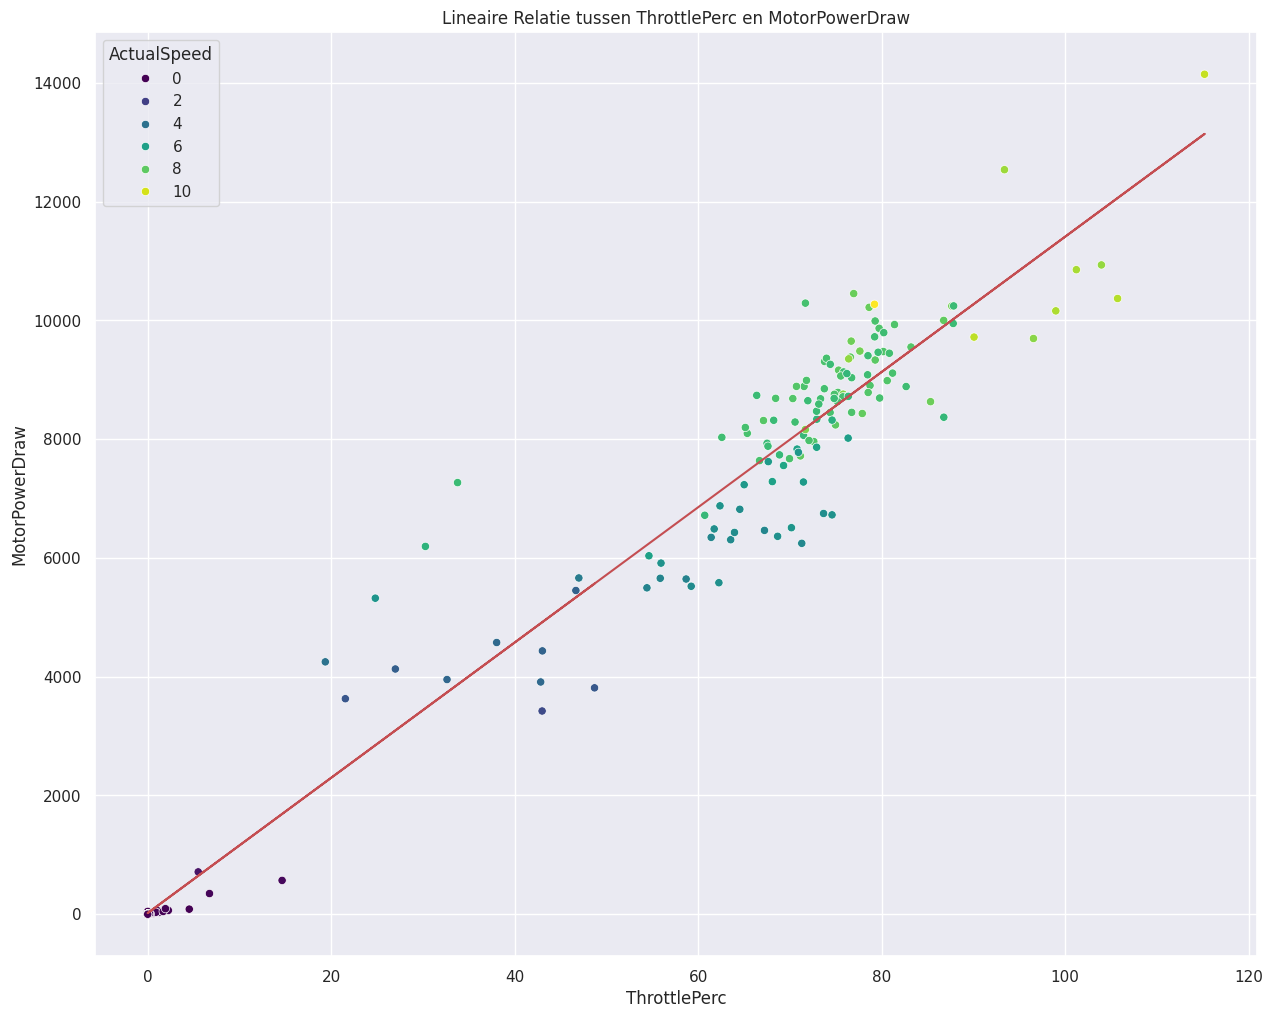

Samenvatting voor MotorPowerDraw:
  Helling (Slope): 113.91
  Intercept: 20.43
  Correlatiecoëfficiënt (R-waarde): 0.99
  P-waarde: 0.00
  Sterke en significante relatie.




In [ ]:
#My code testplot_linear_relationships(df,'RearAxle1' ,'MotorPowerDraw',hue_column='MotorTemp')
plot_linear_relationships(df, 'ThrottlePerc','MotorPowerDraw',hue_column='ActualSpeed')

    'BatMaxV', 'BatMinV', 'BatSOC', 'BatTotalCurrent', 'BatTotalVoltage', 'CompOnOff', 
    'StopOnOff', 'ThrottlePerc', 'BrakePerc', 'Signal', 'TotalDistance', 'FrontAxle', 'RearAxle1', 
    'RearAxle2', 'CompPower', 'FC2AirFlow', 'FC2Cool', 'FC2Current', 'FC2Volt', 'FC3AirFlow', 
    'FC3Cool', 'FC3Current', 'FC3Volt', 'FC1AirFlow', 'FC1Cool', 'FC1Current', 'FC1Volt', 'H2Perc', 'H2Press', 'H2Temp', 'H2Weight', 
    'HVACDraw', 'MotorRPM', 'MotorTorque', 'MotorUseCurrent', 'MotorTemp', 'BattOutputPower', 
    'MotorPowerDraw', 'TotalFCPower', 'ActualSpeed', 'TotalPowerDraw'

In [12]:
#My code, make a multivariat regression models based on selected features 
from sklearn.linear_model import LinearRegression
import pandas as pd


# Drop rows with NaN values in specified columns
clean_df = df.dropna(subset=['BatSOC', 'ThrottlePerc', 'RearAxle1', 'MotorRPM', 'MotorTorque', 'MotorTemp', 'BattOutputPower', 'TotalFCPower', 'ActualSpeed', 'TotalPowerDraw', 'AirTemp'])

# Independent variables
X = clean_df[['BatSOC', 'ThrottlePerc', 'RearAxle1', 'MotorRPM', 'MotorTorque', 'MotorTemp', 'BattOutputPower', 'TotalFCPower', 'ActualSpeed', 'TotalPowerDraw', 'AirTemp']]
# Dependent variable
y = clean_df['MotorPowerDraw']

# Create linear regression object
regr = LinearRegression()

# Fit the regression model
regr.fit(X, y)

# Print the coefficients and intercept
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)


Coefficients: 
 [-8.64362381e-01  3.39607352e+00 -4.28347978e-02  1.15674981e+02
  2.10261166e+01  3.36679510e+00  1.03427166e-02 -2.53233791e-04
  2.02431216e+01  6.46146525e-03 -2.01582158e+01]
Intercept: 
 462.46818590683324


Conclusion, very high coefficients, continue with regularization to lower the coefficients, Lasso can help in feature selection because it can completely eliminate the weight of some features. It is particularly useful when you suspect that only a subset of your predictors actually impacts your response variable.

In [ ]:
#My code add laso regularization
from sklearn.linear_model import Lasso
import pandas as pd


# Drop rows with NaN values in specified columns
clean_df = df.dropna(subset=['BatSOC', 'ThrottlePerc', 'RearAxle1', 'MotorRPM', 'MotorTorque', 'MotorTemp', 'BattOutputPower', 'TotalFCPower', 'ActualSpeed', 'TotalPowerDraw', 'AirTemp'])

# Independent variables
X = clean_df[['BatSOC', 'ThrottlePerc', 'RearAxle1', 'MotorRPM', 'MotorTorque', 'MotorTemp', 'BattOutputPower', 'TotalFCPower', 'ActualSpeed', 'TotalPowerDraw', 'AirTemp']]
# Dependent variable
y = clean_df['MotorPowerDraw']

# Create Lasso regression object
# Note: Alpha is the regularization strength; larger values specify stronger regularization.
# Common practice is to try several values through cross-validation to find the best one.
lasso_regr = Lasso(alpha=1.0)  # You can adjust alpha based on your needs

# Fit the regression model
lasso_regr.fit(X, y)

# Print the coefficients and intercept
print('Coefficients: \n', lasso_regr.coef_)
print('Intercept: \n', lasso_regr.intercept_)
print(model.summary())

Coefficients: 
 [-8.74964703e-01  2.98897471e+00 -4.26763025e-02  1.80598220e+02
  2.11396439e+01  3.44382986e+00  1.03386039e-02 -1.12134937e-04
 -3.49460685e+02  6.39174074e-03 -2.01608872e+01]
Intercept: 
 460.036938567554
                            OLS Regression Results                            
Dep. Variable:         MotorPowerDraw   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                 4.302e+04
Date:                Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                        17:27:51   Log-Likelihood:            -4.0322e+06
No. Observations:              339339   AIC:                         8.064e+06
Df Residuals:                  339335   BIC:                         8.064e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                          

/home/joelva/.pyenv/versions/3.11.5/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.698e+06, tolerance: 2.666e+05
  model = cd_fast.enet_coordinate_descent(


In [ ]:
#My code add Ridge regularization
from sklearn.linear_model import Ridge
import pandas as pd


# Drop rows with NaN values in specified columns
clean_df = df.dropna(subset=['BatSOC', 'ThrottlePerc', 'RearAxle1', 'MotorRPM', 'MotorTorque', 'MotorTemp', 'BattOutputPower', 'TotalFCPower', 'ActualSpeed', 'TotalPowerDraw', 'AirTemp'])

# Independent variables
X = clean_df[['BatSOC', 'ThrottlePerc', 'RearAxle1', 'MotorRPM', 'MotorTorque', 'MotorTemp', 'BattOutputPower', 'TotalFCPower', 'ActualSpeed', 'TotalPowerDraw', 'AirTemp']]
# Dependent variable
y = clean_df['MotorPowerDraw']

# Create Ridge regression object
# Note: Alpha is the regularization strength; larger values specify stronger regularization.
# It's common practice to try several values through cross-validation to find the best one.
ridge_regr = Ridge(alpha=1.0)  # You can adjust alpha based on your needs

# Fit the regression model
ridge_regr.fit(X, y)

# Print the coefficients and intercept
print('Coefficients: \n', ridge_regr.coef_)
print('Intercept: \n', ridge_regr.intercept_)
print(model.summary())

Coefficients: 
 [-8.64326749e-01  3.40959181e+00 -4.28591842e-02  1.15646970e+02
  2.10251349e+01  3.37028896e+00  1.03504234e-02 -2.32297545e-04
  2.02382198e+01  6.46482254e-03 -2.01577896e+01]
Intercept: 
 462.5579723749843
                            OLS Regression Results                            
Dep. Variable:         MotorPowerDraw   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                 4.302e+04
Date:                Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                        17:29:14   Log-Likelihood:            -4.0322e+06
No. Observations:              339339   AIC:                         8.064e+06
Df Residuals:                  339335   BIC:                         8.064e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                         

In [ ]:
#My code use Cross validation to find best alpha

from sklearn.linear_model import RidgeCV

# RidgeCV automatically finds the best alpha through cross-validation
ridge_cv = RidgeCV(alphas=[0.1, 1.0, 10.0], cv=5)  # You can set your own alphas and cv (cross-validation) strategy
ridge_cv.fit(X, y)

print('Optimal alpha: ', ridge_cv.alpha_)
print('Coefficients: \n', ridge_cv.coef_)
print('Intercept: \n', ridge_cv.intercept_)

Optimal alpha:  0.1
Coefficients: 
 [-8.64358819e-01  3.39742587e+00 -4.28372373e-02  1.15672179e+02
  2.10260184e+01  3.36714459e+00  1.03434875e-02 -2.51139718e-04
  2.02426313e+01  6.46180102e-03 -2.01581732e+01]
Intercept: 
 462.4771690057287


In [ ]:
#My code add Ridge regularization with best alpha 0,1
from sklearn.linear_model import Ridge
import pandas as pd


# Drop rows with NaN values in specified columns
clean_df = df.dropna(subset=['BatSOC', 'ThrottlePerc', 'RearAxle1', 'MotorRPM', 'MotorTorque', 'MotorTemp', 'BattOutputPower', 'TotalFCPower', 'ActualSpeed', 'TotalPowerDraw', 'AirTemp'])

# Independent variables
X = clean_df[['BatSOC', 'ThrottlePerc', 'RearAxle1', 'MotorRPM', 'MotorTorque', 'MotorTemp', 'BattOutputPower', 'TotalFCPower', 'ActualSpeed', 'TotalPowerDraw', 'AirTemp']]
# Dependent variable
y = clean_df['MotorPowerDraw']

# Create Ridge regression object
# Note: Alpha is the regularization strength; larger values specify stronger regularization.
# It's common practice to try several values through cross-validation to find the best one.
ridge_regr = Ridge(alpha=0.1)  # You can adjust alpha based on your needs

# Fit the regression model
ridge_regr.fit(X, y)

# Print the coefficients and intercept
print('Coefficients: \n', ridge_regr.coef_)
print('Intercept: \n', ridge_regr.intercept_)
print(model.summary())

Coefficients: 
 [-8.64358819e-01  3.39742587e+00 -4.28372373e-02  1.15672179e+02
  2.10260184e+01  3.36714459e+00  1.03434875e-02 -2.51139718e-04
  2.02426313e+01  6.46180102e-03 -2.01581732e+01]
Intercept: 
 462.4771690057287
                            OLS Regression Results                            
Dep. Variable:         MotorPowerDraw   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                 4.302e+04
Date:                Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                        17:31:46   Log-Likelihood:            -4.0322e+06
No. Observations:              339339   AIC:                         8.064e+06
Df Residuals:                  339335   BIC:                         8.064e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                         